In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file_path = "../data/batting.csv"
batting_df = pd.read_csv(file_path)
batting_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112179,zimmebr01,2022,1,TOR,AL,77,76,11,8,4,...,3.0,2.0,1.0,5,33.0,0.0,5.0,1.0,0.0,0.0
112180,zimmebr01,2022,2,PHI,NL,9,16,4,4,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
112181,zimmebr01,2022,3,TOR,AL,23,13,3,1,0,...,2.0,1.0,1.0,0,8.0,0.0,1.0,0.0,0.0,0.0
112182,zimmebr02,2022,1,BAL,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
batting_df = batting_df[batting_df['yearID'] >= 2016]
batting_df_group = batting_df.groupby(['teamID', 'yearID']).sum()
batting_df_group

stint     G    AB    R     H   2B  3B   HR    RBI     SB    CS  \
teamID yearID                                                                   
ARI    2016       50  2399  5665  752  1479  285  56  190  709.0  137.0  31.0   
       2017       48  2360  5525  812  1405  314  39  220  776.0  103.0  30.0   
       2018       55  2409  5460  693  1283  259  50  176  658.0   79.0  25.0   
       2019       48  2418  5633  813  1419  288  40  220  778.0   88.0  14.0   
       2020       48   862  1997  269   482  101  12   58  255.0   23.0   7.0   
...              ...   ...   ...  ...   ...  ...  ..  ...    ...    ...   ...   
WAS    2018       55  2441  5517  771  1402  284  25  191  737.0  119.0  33.0   
       2019       58  2327  5512  873  1460  298  27  231  824.0  116.0  29.0   
       2020       44   870  1968  293   519  112  12   66  279.0   33.0  12.0   
       2021       67  2386  5385  724  1388  272  20  182  686.0   56.0  26.0   
       2022       62  2347  5434  603  1351  252  20  136  579.0   75.0  31.0   

                BB      SO   IBB   HBP    SH    SF   GIDP  
teamID yearID                                              
ARI    2016    463  1427.0  43.0  50.0  43.0  38.0  117.0  
       2017    578  1456.0  44.0  54.0  39.0  27.0  106.0  
       2018    560  1460.0  36.0  52.0  38.0  45.0  110.0  
       2019    540  1360.0  36.0  70.0  31.0  40.0  120.0  
       2020    181   461.0   5.0  36.0   1.0  23.0   37.0  
...            ...     ...   ...   ...   ...   ...    ...  
WAS    2018    631  1289.0  56.0  59.0  41.0  40.0  104.0  
       2019    584  1308.0  33.0  81.0  48.0  42.0  117.0  
       2020    192   451.0  16.0  32.0   5.0  21.0   42.0  
       2021    573  1303.0  43.0  84.0  38.0  31.0  158.0  
       2022    442  1221.0  12.0  60.0  20.0  37.0  141.0  

[210 rows x 18 columns]

In [4]:
batting_clean_df=batting_df_group.loc[:,['AB','H']]
batting_clean_df['AVG']=batting_clean_df['H']/batting_clean_df['AB']
batting_clean_df = batting_clean_df.rename_axis(index={'yearID':'year'})
batting_clean_df = batting_clean_df.rename_axis(index={'teamID':'team'})
batting_clean_df.head(20)

AB     H       AVG
team year                      
ARI  2016  5665  1479  0.261077
     2017  5525  1405  0.254299
     2018  5460  1283  0.234982
     2019  5633  1419  0.251908
     2020  1997   482  0.241362
     2021  5489  1297  0.236291
     2022  5351  1232  0.230237
ATL  2016  5514  1404  0.254625
     2017  5584  1467  0.262715
     2018  5582  1433  0.256718
     2019  5560  1432  0.257554
     2020  2074   556  0.268081
     2021  5363  1307  0.243707
     2022  5509  1394  0.253040
BAL  2016  5524  1413  0.255793
     2017  5650  1469  0.260000
     2018  5507  1317  0.239150
     2019  5596  1379  0.246426
     2020  2026   523  0.258144
     2021  5420  1296  0.239114

In [5]:
batting_clean_df.to_csv("../Data/cleanedbatting.csv", sep=",")

In [6]:
file_path_salary = "../data/salary2019-2021.csv"

In [7]:
salary_df = pd.read_csv(file_path_salary)
salary_df.head()

,year,team,name,salary,playerID
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666,500871
1,2019,arizona-diamondbacks,Robbie Ray,6050000,592662
2,2019,arizona-diamondbacks,Taijuan Walker,5025000,592836
3,2019,arizona-diamondbacks,Jake Lamb,4825000,571875
4,2019,arizona-diamondbacks,Adam Jones,4500000,430945


In [8]:
replaced_dict = {'arizona-diamondbacks': 'ARI', 
                'atlanta-braves':'ATL',
                'baltimore-orioles':'BAL',
                'boston-red-sox':'BOS',
                'chicago-cubs':'CHN',
                'chicago-white-sox':'CHA',
                'cincinnati-reds':'CIN',
                'cleveland-indians':'CLE',
                'colorado-rockies':'COL',
                'detroit-tigers':'DET',
                'houston-astros':'HOU',
                'kansas-city-royals':'KCA',
                'los-angeles-angels':'LAA',
                'los-angeles-dodgers':'LAN',
                'miami-marlins':'MIA',
                'milwaukee-brewers':'MIL',
                'minnesota-twins':'MIN',
                'new-york-mets':'NYN',
                'new-york-yankees':'NYA',
                'oakland-athletics':'OAK',
                'philadelphia-phillies':'PHI',
                'pittsburgh-pirates':'PIT',
                'san-diego-padres':'SDN',
                'san-francisco-giants':'SFN',
                'seattle-mariners':'SEA',
                'st-louis-cardinals':'SLN',
                'tampa-bay-rays':'TBA',
                'texas-rangers':'TEX',
                'toronto-blue-jays':'TOR',
                'washington-nationals':'WAS'}
salary_df.replace(replaced_dict, inplace=True)
salary_df_group = salary_df.groupby(['team', 'year']).sum()
salary_df_group.head()

salary  playerID
team year                     
ARI  2019   62990590  14340869
     2020   20167910  15149213
     2021   65782480  12846777
ATL  2019  115629465  11685563
     2020   50392877  11091236

In [9]:
salary_clean_df=salary_df_group.loc[:,['salary']]
salary_clean_df.head(60)

salary
team year           
ARI  2019   62990590
     2020   20167910
     2021   65782480
ATL  2019  115629465
     2020   50392877
     2021  104662952
BAL  2019   51471496
     2020   10186863
     2021   20556843
BOS  2019  163861035
     2020   35983017
     2021  120716005
CHA  2019   66747887
     2020   42914180
     2021   91532367
CHN  2019  196000476
     2020   66076009
     2021  137973667
CIN  2019   83437362
     2020   51806648
     2021   89761594
CLE  2019   82518676
     2020   34294558
     2021   38698124
COL  2019  119385328
     2020   23899833
     2021   85428344
DET  2019   72053266
     2020   29576998
     2021   65698379
HOU  2019  154064539
     2020   60893762
     2021  153899028
KCA  2019   67555916
     2020   25214058
     2021   83924145
LAA  2019  112991363
     2020   56490745
     2021   59237446
LAN  2019  155897747
     2020   76953189
     2021  153292430
MIA  2019   66005960
     2020   14541262
     2021   42215854
MIL  2019  105372018
     2020   28328474
     2021   58607106
MIN  2019   94602227
     2020   44784585
     2021  113793211
NYA  2019  169823113
     2020   77116014
     2021  143347870
NYN  2019  103028613
     2020   46289920
     2021  152205673
OAK  2019   77230719
     2020   35193540
     2021   69588634

In [10]:
salary_clean_df.to_csv("../Data/cleanedsalary.csv", sep=",")

In [11]:
merged_bsb_df = pd.merge(batting_clean_df,salary_clean_df,left_index=True, right_index=True, how='inner')
merged_bsb_df.head(20)

AB     H       AVG     salary
team year                                 
ARI  2019  5633  1419  0.251908   62990590
     2020  1997   482  0.241362   20167910
     2021  5489  1297  0.236291   65782480
ATL  2019  5560  1432  0.257554  115629465
     2020  2074   556  0.268081   50392877
     2021  5363  1307  0.243707  104662952
BAL  2019  5596  1379  0.246426   51471496
     2020  2026   523  0.258144   10186863
     2021  5420  1296  0.239114   20556843
BOS  2019  5770  1554  0.269324  163861035
     2020  2083   552  0.265002   35983017
     2021  5495  1434  0.260965  120716005
CHA  2019  5529  1443  0.260988   66747887
     2020  2047   534  0.260870   42914180
     2021  5357  1373  0.256300   91532367
CHN  2019  5461  1378  0.252335  196000476
     2020  1918   422  0.220021   66076009
     2021  5306  1255  0.236525  137973667
CIN  2019  5450  1328  0.243670   83437362
     2020  1842   390  0.211726   51806648

In [12]:
merged_bsb_df.to_csv("../Data/mergedbattingandsalary.csv", sep=",")

<AxesSubplot:xlabel='salary', ylabel='AVG'>

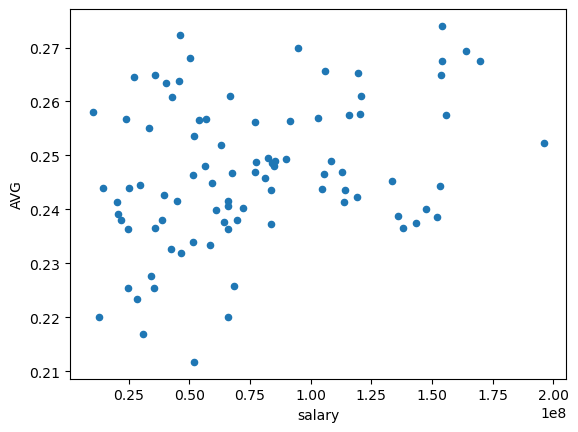

In [13]:
merged_bsb_df.plot.scatter(x='salary',y='AVG')

Correlation coefficient: 0.3294363459885554
Slope: 1.003615145458997e-10
Intercept: 0.2389827259395435
R-squared value: 0.10852830605829113


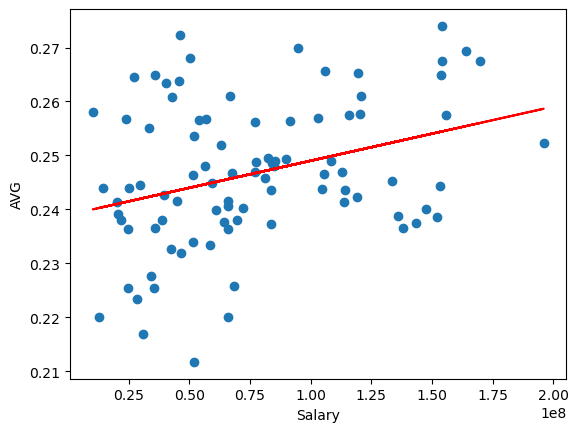

In [14]:
corr_coeff = st.pearsonr(merged_bsb_df['salary'], merged_bsb_df['AVG'])[0]
print("Correlation coefficient:", corr_coeff)
slope, intercept, r_value, p_value, std_err = st.linregress(merged_bsb_df['salary'], merged_bsb_df['AVG'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
plt.scatter(merged_bsb_df['salary'], merged_bsb_df['AVG'])
plt.plot(merged_bsb_df['salary'], intercept + slope*merged_bsb_df['salary'], 'r')
plt.xlabel('Salary')
plt.ylabel('AVG')
plt.show()
#plt.savefig("../images/avgsalaryscatter.png")

In [15]:
file_path_3 = '../data/mlbage2019-2021.csv'
age_df = pd.read_csv(file_path_3)
age_df

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Year
0,Whit Merrifield,KC,2B,34,162,681,105,206,41,10,...,45,126,0,4,5,0.302,0.348,0.463,0.811,2019
1,Marcus Semien,OAK,2B,32,162,657,123,187,43,7,...,87,102,0,1,2,0.285,0.369,0.522,0.891,2019
2,Rafael Devers,BOS,3B,26,156,647,129,201,54,4,...,48,119,1,2,4,0.311,0.361,0.555,0.916,2019
3,Jonathan Villar,BAL,3B,31,162,642,111,176,33,5,...,61,176,2,4,4,0.274,0.339,0.453,0.792,2019
4,Ozzie Albies,ATL,2B,26,160,640,102,189,43,8,...,54,112,0,4,4,0.295,0.352,0.500,0.852,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,Kevin Padlo,SEA,3B,26,1,1,0,0,0,0,...,0,1,0,0,0,0.000,0.000,0.000,0.000,2021
2032,Hoy Park,NYY,SS,26,1,1,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,2021
2033,Skye Bolt,SF,OF,29,2,1,0,0,0,0,...,0,1,0,0,0,0.000,0.000,0.000,0.000,2021
2034,Tyler Ladendorf,CHC,2B,35,1,1,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,2021


In [24]:
age_df_group = age_df.groupby(['Team', 'Year']).mean()
age_df_group=age_df_group[['Age','H','AB']]
age_df_group['AVG']=age_df_group['H']/age_df_group['AB']
age_df_group=age_df_group[['Age','AVG']]
age_df_group

Age       AVG
Team Year                     
ARI  2019  32.095238  0.259696
     2020  31.250000  0.241362
     2021  30.107143  0.241939
ATL  2019  32.400000  0.266705
     2020  31.000000  0.268081
...              ...       ...
TOR  2020  28.904762  0.255067
     2021  29.083333  0.266532
WAS  2019  31.904762  0.272832
     2020  31.950000  0.263720
     2021  30.642857  0.265781

[90 rows x 2 columns]

In [25]:
age_df_group.to_csv("../Data/groupedage.csv", sep=",")

Correlation coefficient: 0.2995760971433594
Slope: 0.003722072357075101
Intercept: 0.13491752545243968
R-squared value: 0.08974583797964752


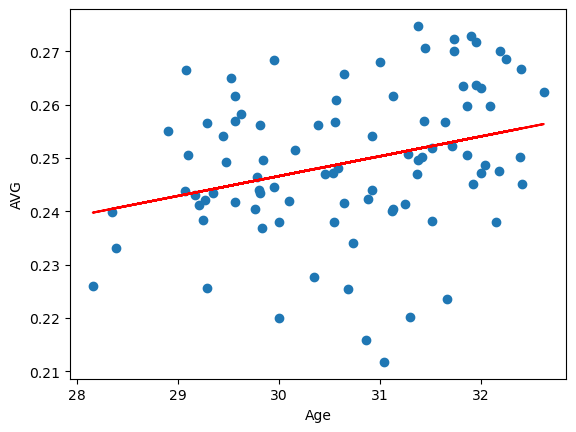

In [28]:
#age_df_group.plot.scatter(x='Age',y='AVG')
corr_coeff = st.pearsonr(age_df_group['Age'], age_df_group['AVG'])[0]
print("Correlation coefficient:", corr_coeff)
slope, intercept, r_value, p_value, std_err = st.linregress(age_df_group['Age'], age_df_group['AVG'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
plt.scatter(age_df_group['Age'], age_df_group['AVG'])
plt.plot(age_df_group['Age'], intercept + slope*age_df_group['Age'], 'r')
plt.xlabel('Age')
plt.ylabel('AVG')
plt.savefig("../images/avgagescatter.png")

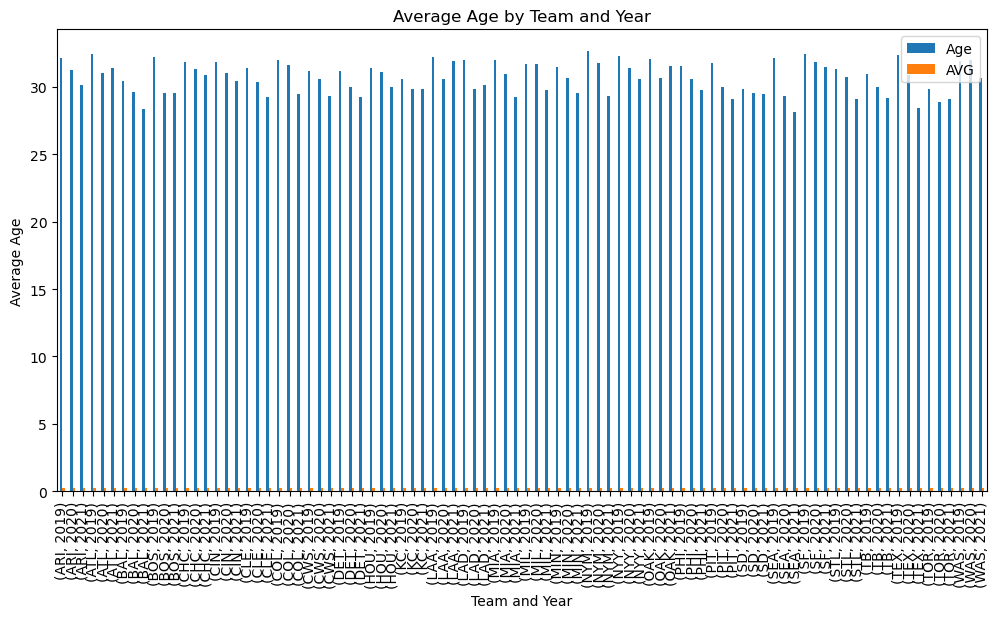

In [29]:
age_df_group.plot(kind='bar', figsize=(12,6))
plt.title('Average Age by Team and Year')
plt.xlabel('Team and Year')
plt.ylabel('Average Age')
plt.show()

In [37]:
age_bar = age_df_group.reset_index()
age_bar

,Team,Year,Age,AVG
0,ARI,2019,32.095238,0.259696
1,ARI,2020,31.250000,0.241362
2,ARI,2021,30.107143,0.241939
3,ATL,2019,32.400000,0.266705
4,ATL,2020,31.000000,0.268081
...,...,...,...,...
85,TOR,2020,28.904762,0.255067
86,TOR,2021,29.083333,0.266532
87,WAS,2019,31.904762,0.272832
88,WAS,2020,31.950000,0.263720


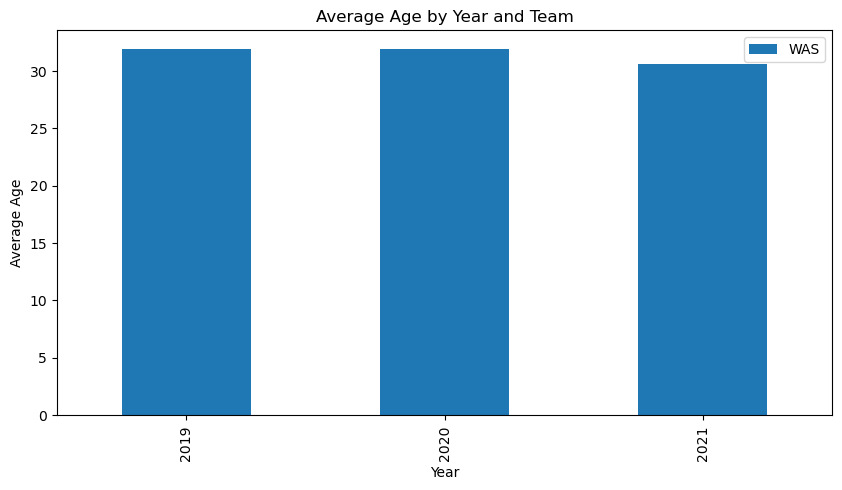

In [40]:
teams = age_bar['Team'].unique()

team_data = age_bar[age_bar['Team'] == team]
team_data.plot(kind='bar', x='Year', y='Age', label=team, figsize=(10,5))

# Add a title and axis labels
plt.title('Average Age by Year and Team')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend()
plt.show()

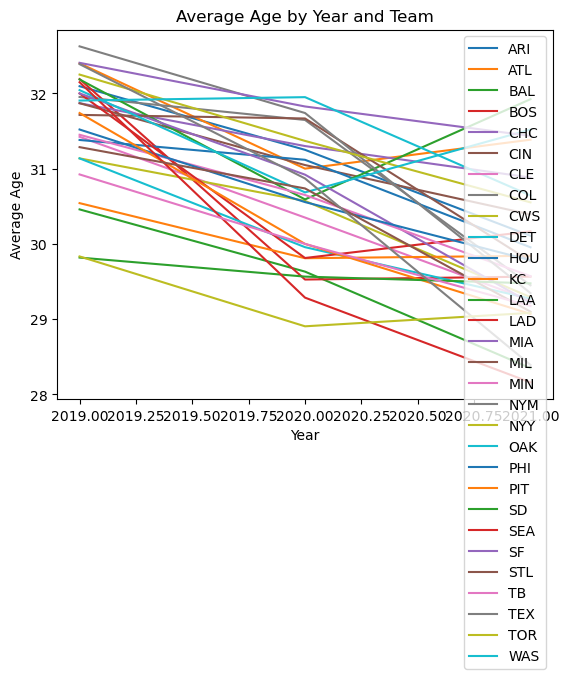

In [41]:
pivot_df = age_bar.pivot_table(index=['Team', 'Year'], values='Age', aggfunc='mean')

# Reset the index to make 'Team' and 'Year' regular columns
pivot_df = pivot_df.reset_index()

# Plot the data for all teams in a single graph
teams = pivot_df['Team'].unique()
for team in teams:
    team_data = pivot_df[pivot_df['Team'] == team]
    plt.plot(team_data['Year'], team_data['Age'], label=team)

# Add a title and axis labels
plt.title('Average Age by Year and Team')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend()
plt.show()